## Banking Customer Churn Analysis


### Import basic required libraries

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
%matplotlib inline

#### Introduction

It is evident that acquiring new customer is much more costlier than retaining existing one. Predicting customer churn enable us to analyze deeper into the variable causing customer to churn, that inturn helps us in formulating strategy to increase customer retentions. We developed classifier models: decision tree, naive bayes, xg-boost and deep learning neural networks models using historical data to predict banking customers' churn. Based on the performace metrices, we evaluate models.XG boost performed better. We also group our customers into several bivariate clusters using k-means clustering, which we used to analyze the profile of churning and non-churning customers. From the cluster analysis, We have found that churn rate is very high in customers of age above 35, which is a serious concern.   
 


### Exploratory Data Analysis

#### Reading Dataset

In [2]:
dataset = pd.read_csv("D://MSBA//Second Sem//CIS 9660_Datamining//Datasets//Churn_Modelling.csv")
dataset.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
# in gender variable, there are values called "Times", we check the value counts:

dataset['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

#### Checking Basic data stuctures

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


comments: as it can be observed that the only Surename, Geography and Gender Variables are object type and 
    rest are integer and float type. We will convert those float and integer type variables into categorical in the data preparation phase.
    

#### Examining for any NAs

In [5]:
dataset.isna().any()


RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

comment:
    there no any null and NAs in the Dataset 

#### Data Preprocessing and Exploration 

Creating "Region" variable from the "Goegraphy" variable 

In [6]:

Region = list()

for value in dataset["Geography"]:
    if value == "France":
        value = "east"
        Region.append(value)
    elif value == "Spain":
        value = "west"
        Region.append(value)
    else:
        value = "mid"
        Region.append(value)

dataset["Region"] = Region   

# drop geography variable 

dataset = dataset.drop(["Geography"], axis = 1)


In [7]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Region
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,east
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,west
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,east
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,east
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,west


#### Deleting Unnecessary Columns (Variables)

In [8]:
# Rownumber, Customerid and Surename will not contribute anything in the analysis, so we drop them. 

churn_df = dataset.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

#### Convert all the column-names in lowercase

In [9]:
# it is good practice to use the variable names in lowercase, as it increases the productivity. 
churn_df = churn_df.rename(columns = str.lower)
churn_df.columns

Index(['creditscore', 'gender', 'age', 'tenure', 'balance', 'numofproducts',
       'hascrcard', 'isactivemember', 'estimatedsalary', 'exited', 'region'],
      dtype='object')

In [10]:
#churn_df.info()

#### Convert "exited", "hascrcard" and "isactivemember" to a categorical type 

In [11]:
# as these variable are infact categorical type, we convert them into the categorical type from integer type

churn_df['exited'] = pd.Categorical(churn_df.exited)
churn_df['isactivemember'] = pd.Categorical(churn_df.isactivemember)
churn_df['hascrcard'] = pd.Categorical(churn_df.hascrcard)
#churn_df['numofproducts'] = pd.Categorical(churn_df.numofproducts )


#### Checking structure of the dataframe 

In [12]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   creditscore      10000 non-null  int64   
 1   gender           10000 non-null  object  
 2   age              10000 non-null  int64   
 3   tenure           10000 non-null  int64   
 4   balance          10000 non-null  float64 
 5   numofproducts    10000 non-null  int64   
 6   hascrcard        10000 non-null  category
 7   isactivemember   10000 non-null  category
 8   estimatedsalary  10000 non-null  float64 
 9   exited           10000 non-null  category
 10  region           10000 non-null  object  
dtypes: category(3), float64(2), int64(4), object(2)
memory usage: 654.8+ KB


#### Examining Distribution of all the variables

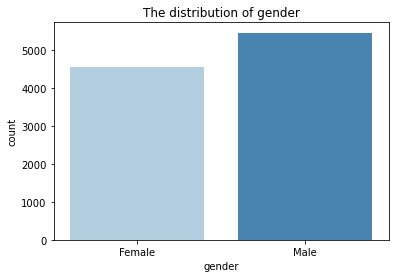

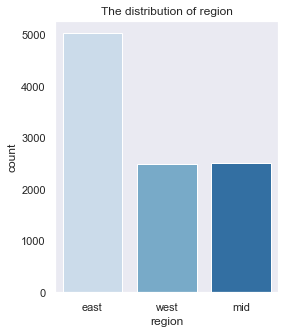

In [13]:
for col in churn_df.columns:
    if churn_df[col].dtype == 'object':
        sns.countplot (data = churn_df, x = col, palette = "Blues")
        plt.xlabel(col)
        plt.title ('The distribution of ' + col)
        plt.grid (False)
        plt.show (block  = False)
        sns.set (rc ={'figure.figsize': (4,5)}) 
            

Comment: We observe that half of our customers are in east region, 
    and 25 percent each of our customer are from west and mid regions
    
Also, our customer are more females. 

### Histograms of numerical variables

array([[<AxesSubplot:title={'center':'creditscore'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'balance'}>],
       [<AxesSubplot:title={'center':'numofproducts'}>,
        <AxesSubplot:title={'center':'estimatedsalary'}>]], dtype=object)

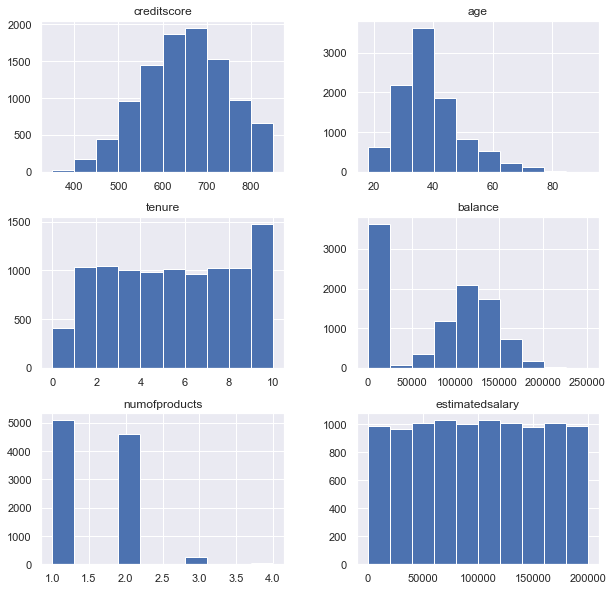

In [14]:
churn_df.hist( figsize = (10, 10 ))

Comments:
1. creditscore variable is more skewed toward the left and centered around the 660. 
2. age variable is more skewed towards the right and centered around 40 years.
3. tenure variable almost equally distributed  except for the 0 and 10 years. 
    We have more customers who have been with us for longer time
4. there are about 3600 customers who have 0 balance. But except that,the distribution is quite normal. 
    balance is centered around 120000
5. most of our customer use 1 or 2 numbers of our products / service 
6. estimatedsalary is equally distributed, and  is centered around 100000

We do not observed anything unsual or extreme 

####  Summary statistics

In [15]:

churn_df.describe()


,creditscore,age,tenure,balance,numofproducts,estimatedsalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


Checking for outliers and other descriptive features of numerical data

#### Examining Outliers 

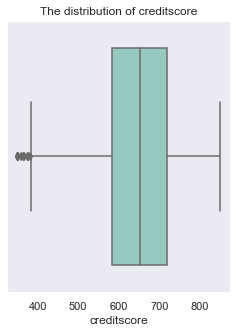

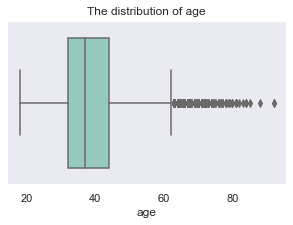

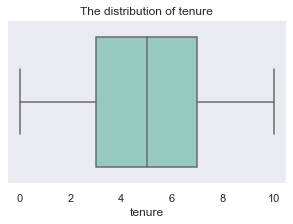

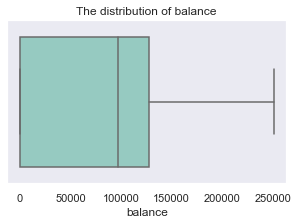

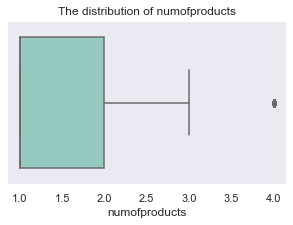

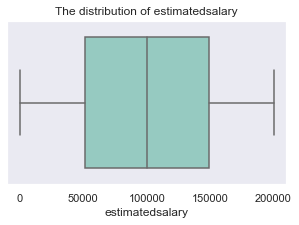

In [16]:
for col in churn_df:
    if churn_df[col].dtype == 'int64' or  churn_df[col].dtype == 'float64':
        sns.boxplot (data = churn_df, x = col, palette = "Set3")
        plt.xlabel(col)
        plt.title ('The distribution of ' + col)
        plt.grid (False)
        plt.show (block  = False)
        sns.set (rc ={'figure.figsize': (5,3)}) 
        
        

Comment:
As it can be observed that only age, credit score, and number of products have some outliers. 
1. there are some customers whose credit score is less than 400, which could be possible as the lowest possible credit score is 300. 
2. the oberved outliers of age actually are not the outliers because, there are customers who can be around 90  - 100 year
3. there are some customers, who uses four number of products and that is reasonable. So, We do not considered them as outliers. 

#### Examining correlation between of of all the numerical variables 

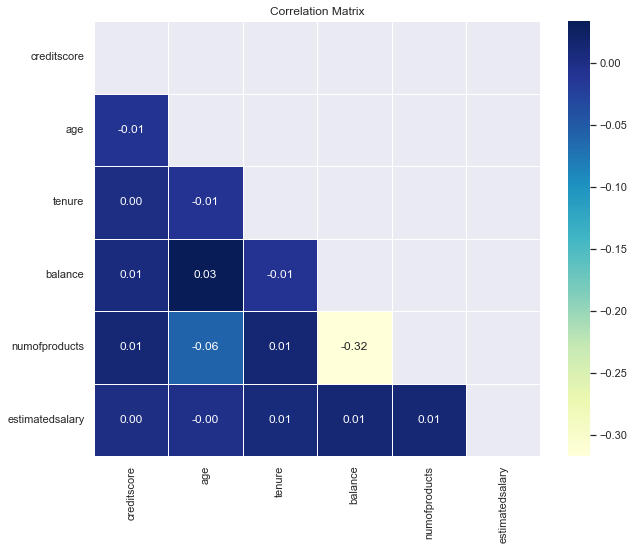

In [17]:
plt.figure(figsize = (10, 8))
corr = churn_df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

Comment:
    it can be observed that variables are not correlead, and only balance and numof products are negatively correlated. 
    Hence, we can safely ignore the minimum multicollinearty between the explanatory variables

### Data Preparation and some descriptive analysis

##### Discretization of Numerical Variables into the categorical

######  for the classifier such as decision trees, it is important to have all the variables are categorical, hence we discretize the continous and numeric variables into categorical. 

C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


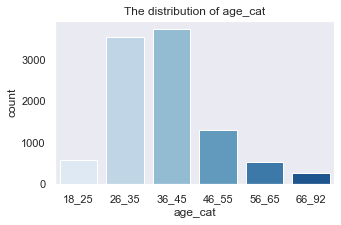

In [18]:
#first convert age to a categorical variable 
bins = [churn_df['age'].min(), 25, 35, 45, 55, 65, churn_df['age'].max()]
labels = [str(churn_df['age'].min()) +'_25', '26_35', '36_45', '46_55', '56_65', '66_'+ str(churn_df['age'].max())]
churn_df['age_cat'] = pd.cut(churn_df['age'], bins, labels = labels, duplicates = "drop")

sns.countplot (churn_df['age_cat'], palette = "Blues")

plt.title ('The distribution of age_cat')
plt.grid (False)
plt.show (block  = False)
sns.set (rc ={'figure.figsize': (4,4)}) 

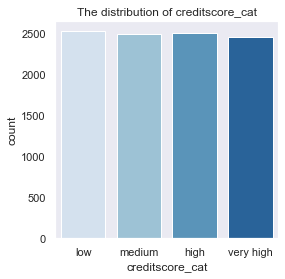

In [19]:
# Convert credit score to categorical variable
bins  = [churn_df['creditscore'].min(), 584, 652, 718, churn_df['creditscore'].max()]
labels = ['low', 'medium', 'high', 'very high']
churn_df['creditscore_cat'] = pd.cut(churn_df['creditscore'], bins, labels = labels)
sns.countplot (churn_df['creditscore_cat'], palette = "Blues")
plt.title ('The distribution of creditscore_cat')
plt.grid (False)
plt.show (block  = False)
sns.set (rc ={'figure.figsize': (4,4)}) 

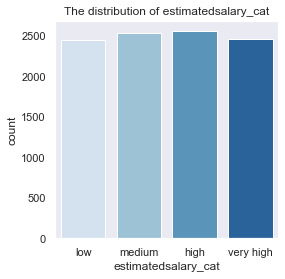

In [20]:
# Convert estimatedsalary to categorical variable
bins = [churn_df['estimatedsalary'].min(), 50000, 100000, 150000,  churn_df['estimatedsalary'].max()]
labels = ['low', 'medium', 'high', 'very high']
churn_df['estimatedsalary_cat'] = pd.cut(churn_df['estimatedsalary'], bins, labels = labels)
sns.countplot (churn_df['estimatedsalary_cat'], palette = "Blues")
plt.title ('The distribution of estimatedsalary_cat')
plt.grid (False)
plt.show (block  = False)
sns.set (rc ={'figure.figsize': (4,4)}) 

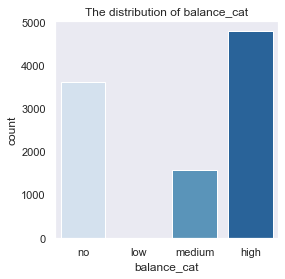

In [21]:
# Convert balance to categorical variable
bins = [-1, 10, 10000, 100000, churn_df['balance'].max()]
labels = ['no', 'low', 'medium', 'high']
churn_df['balance_cat'] = pd.cut(churn_df['balance'], bins, labels = labels)
sns.countplot (churn_df['balance_cat'], palette = "Blues")
plt.title ('The distribution of balance_cat')
plt.grid (False)
plt.show (block  = False)
sns.set (rc ={'figure.figsize': (4,4)}) 
### seems there is a problem with this code as it is not giving 0 values, which accounts for 25%

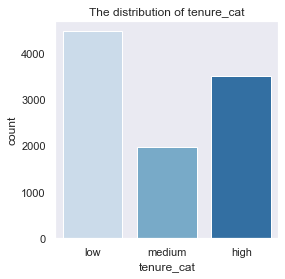

In [22]:
# Convert tenure to categorical variable
bins = [-1, 4, 6, churn_df['tenure'].max()]
labels = ['low', 'medium', 'high']
churn_df['tenure_cat'] = pd.cut(churn_df['tenure'], bins, labels = labels)
sns.countplot (churn_df['tenure_cat'], palette = "Blues")
plt.title ('The distribution of tenure_cat')
plt.grid (False)
plt.show (block  = False)
sns.set (rc ={'figure.figsize': (4,4)})

### Creating a dataframe of all categorical variables

In [23]:
df1 = churn_df.drop(["creditscore", "age", "balance",'tenure', "estimatedsalary"], axis = 1)
df1.head(10)

,gender,numofproducts,hascrcard,isactivemember,exited,region,age_cat,creditscore_cat,estimatedsalary_cat,balance_cat,tenure_cat
0,Female,1,1,1,1,east,36_45,medium,high,no,low
1,Female,1,0,1,0,west,36_45,medium,high,medium,low
2,Female,3,1,0,1,east,36_45,low,high,high,high
3,Female,2,0,0,0,east,36_45,high,medium,no,low
4,Female,1,1,1,0,west,36_45,very high,medium,high,low
5,Male,2,1,0,1,west,36_45,medium,high,high,high
6,Male,2,1,1,0,east,46_55,very high,low,no,high
7,Female,4,1,0,1,mid,26_35,low,high,high,low
8,Male,2,0,1,0,east,36_45,low,medium,high,low
9,Male,1,1,1,0,east,26_35,high,medium,high,low


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               10000 non-null  object  
 1   numofproducts        10000 non-null  int64   
 2   hascrcard            10000 non-null  category
 3   isactivemember       10000 non-null  category
 4   exited               10000 non-null  category
 5   region               10000 non-null  object  
 6   age_cat              9978 non-null   category
 7   creditscore_cat      9995 non-null   category
 8   estimatedsalary_cat  9999 non-null   category
 9   balance_cat          10000 non-null  category
 10  tenure_cat           10000 non-null  category
dtypes: category(8), int64(1), object(2)
memory usage: 313.9+ KB


### Analysis of churn by the all the explanatory variables 

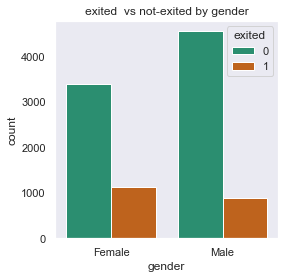

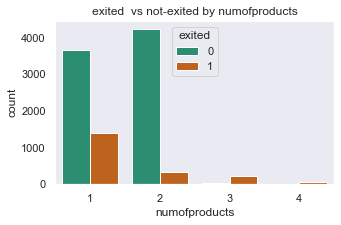

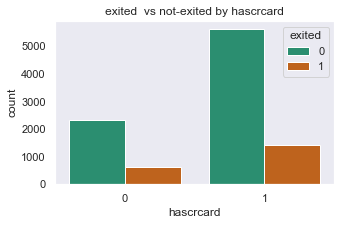

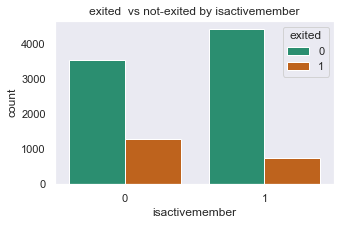

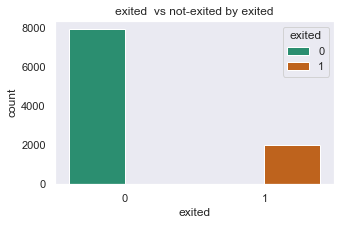

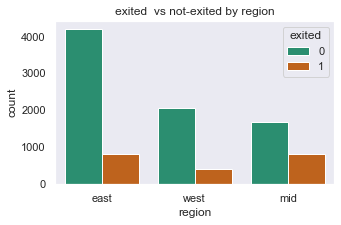

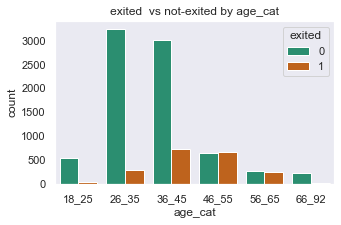

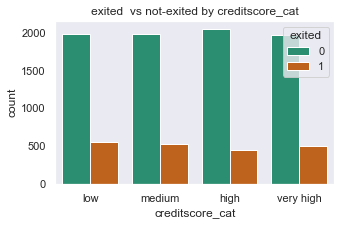

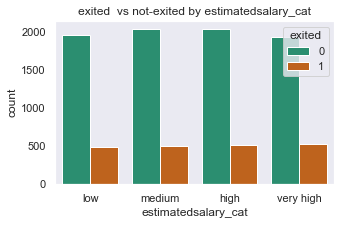

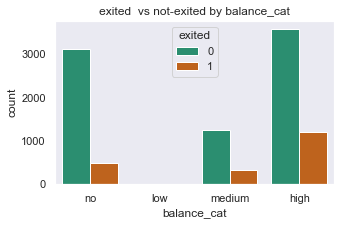

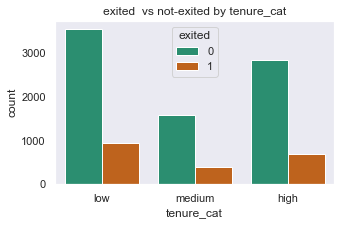

In [25]:
for col in df1:
    sns.countplot (data = df1, x = col, hue = 'exited',palette = "Dark2")
    plt.xlabel(col)
    plt.title ('exited  vs not-exited by ' + col)
    plt.grid (False)
    plt.show (block  = False)
    sns.set (rc ={'figure.figsize': (5,3)}) 
        

Comments:
1. by gender, churn rate is higher in female customer.
2. by number of products, churn rate is high in customer who use one and three products.
3. by hascrcard, churn rate is higher in the customer group who use credit card. 
4. by isactivemember, churn rate is high in the non-active group.
5. by region, churn rate is high with the customers of mid-region.
6. by age_cat, churn rate is high in the customer of age greater than 35.
7. by credit_cat, churn rate is slighlty less with the people having high creditscore. 
8. by estimatedsalary_cat, churn rate is almost equal in all groups. 
9. by balance_cat, churn rate is high in the group of customer who has high balance (this is variable is very important as if the customer of thi group leaves, we will lose big revenue
10. by tenure, customer churn rate is high in group of low tenure.                                                                               

##### Creating a Balanced Class DataFrame 

As it can be observed that the 80 percent of the customers did not churned, and only 20 percent churned. so the data is very skewed towards the not churning customer, as a result, prediction will also be biased towards not churning customers. 



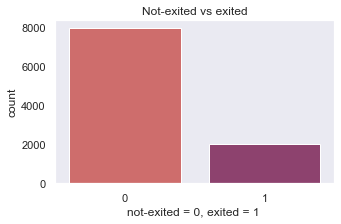

In [26]:
sns.countplot (data = df1, x = 'exited', palette = "flare")
plt.xlabel ('not-exited = 0, exited = 1 ')
plt.title ('Not-exited vs exited')
plt.grid (False)
plt.show (block  = False)
sns.set (rc ={'figure.figsize': (4,3)})

After, creating a new dataframe which consisted the balanced class (meaning equal number of exited  and not-exited customer) and subsequent model, we manage to improve recall percentace significantly to 71 percent, and without significantly compromising the accuracy and precision.


We therefore, now use the balanced class dataframe to further develop and train our models, using larger volume datasets


#### Creating a DataFrame of 2000 not-churned customer

In [27]:
df_nonexited = df1[churn_df.exited ==0]
df_nonexited = df_nonexited.sample(n=2000, random_state = 0) # sampling ramndomly to create a dataframe that consist 2000 records of not-churned customer 
df_nonexited.shape ### non-churned customer

(2000, 11)

#### Creating a DataFrame of 2000 not-churned customer

In [28]:
df_exited = df1[churn_df.exited ==1]
df_exited.shape

(2037, 11)

#### Merging df_nonexited and df_exited 

In [29]:

merged_balanced_df = pd.concat([df_nonexited, df_exited]) # merging dataframes by row 
#merged_sample_balance_df.reset_index(drop = True)
merged_balanced_df = merged_balanced_df.sample(frac=1).reset_index(drop=True) # shuffling records of dataframe 
merged_balanced_df.shape

(4037, 11)

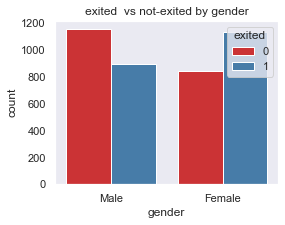

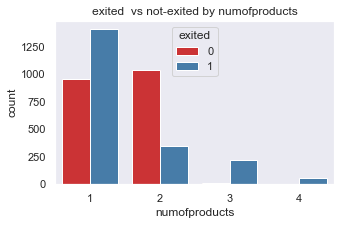

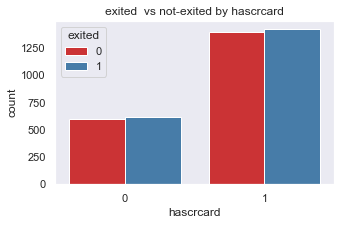

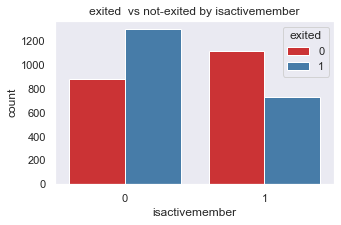

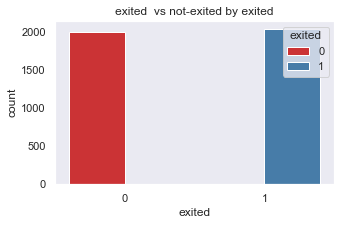

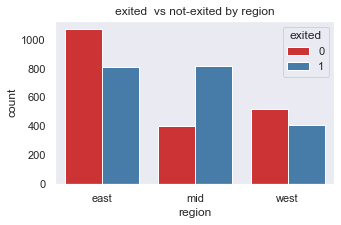

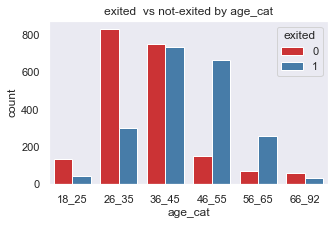

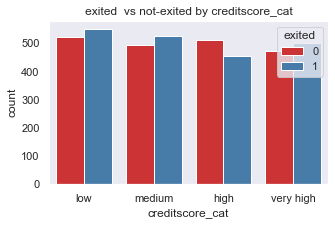

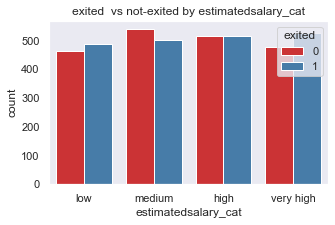

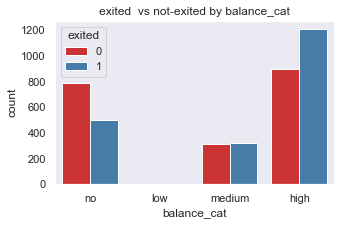

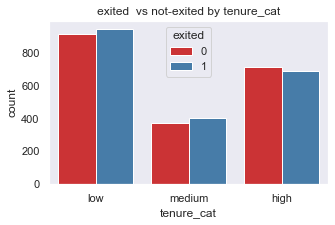

In [30]:
for col in merged_balanced_df:
    sns.countplot (data = merged_balanced_df, x = col, hue = 'exited',palette = "Set1")
    plt.xlabel(col)
    plt.title ('exited  vs not-exited by ' + col)
    plt.grid (False)
    plt.show (block  = False)
    sns.set (rc ={'figure.figsize': (5,3)}) 

Comments: 
1. Churn rate is high is female customers
2. Churn rate is high in customers who uses only one product
3. Churn is high with customer using credit card
4. Churn rate high in active customer
5. Churn rate is high in customer of mid-region
6. Churn rate is high in the customers of age > 35
7. Churn rate is high in the customer whos balance high 
8. Churn is high in customers whos tenure is less 



In [31]:
#### Droping estimatedsalary_cat and creditscore_cat

#merged_balanced_df = merged_balanced_df.drop([ 'estimatedsalary_cat'], axis = 1)

## Data Preparation for Models

### Binarization of the Nominal Variables 

In [32]:
# import required library and package for binarization
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer



#### Binarize the binary categorical valiables 

In [33]:
#first convert gender and hascrcard and isactivemember variables to the binary classification
lb = LabelBinarizer()
merged_balanced_df['gender'] = lb.fit_transform(merged_balanced_df['gender'])
#merged_balanced_df['tenure_cat'] = lb.fit_transform(merged_balanced_df['tenure_cat'])
merged_balanced_df['hascrcard'] = lb.fit_transform(merged_balanced_df['hascrcard'])
merged_balanced_df['isactivemember'] = lb.fit_transform(merged_balanced_df['isactivemember'])
merged_balanced_df.shape

(4037, 11)

#### One hot encoding to binarize the multi-categorical varible "region"

In [34]:
# One Hot Encoding of region variable
dummy1 = pd.get_dummies(merged_balanced_df.region)
#merging sample_df1 and dummy1
balanced_df_dummy = pd.DataFrame(merged_balanced_df).join(dummy1)
balanced_df_dummy.shape


(4037, 14)

#### Level Encoding to level numeric values to ordinal variables 

In [35]:
# label encoding for othe ordinal variables 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
balanced_df_dummy['age_cat'] = le.fit_transform(balanced_df_dummy['age_cat'])
balanced_df_dummy['creditscore_cat'] = le.fit_transform(balanced_df_dummy['creditscore_cat'])
balanced_df_dummy['estimatedsalary_cat'] = le.fit_transform(balanced_df_dummy['estimatedsalary_cat'])    
balanced_df_dummy['balance_cat'] = le.fit_transform(balanced_df_dummy['balance_cat']) 
balanced_df_dummy['tenure_cat'] = le.fit_transform(balanced_df_dummy['tenure_cat'])


In [36]:
# drop region column
balanced_df_main = balanced_df_dummy.drop(['region', 'west'], axis = 1)

Since the value of the variable "west can be identified by functional dependencies between east, mid and west, we can safely drop west. For example if east = 0, mid = 0, then west = 1

In [37]:
balanced_df_main.shape

(4037, 12)

In [38]:
balanced_df_main.head()

,gender,numofproducts,hascrcard,isactivemember,exited,age_cat,creditscore_cat,estimatedsalary_cat,balance_cat,tenure_cat,east,mid
0,1,2,1,1,0,1,1,0,3,1,1,0
1,1,2,1,0,0,1,1,0,0,0,0,1
2,1,1,1,0,1,3,1,3,0,0,0,0
3,0,1,0,0,1,3,3,0,0,0,1,0
4,1,2,0,1,0,1,1,3,3,0,0,0


### Model development

### Splitting the dataset into the Validation, Training and Test Sets 

#### Validation Set 

In [39]:
#validation set 
val_set = balanced_df_main.iloc[3940:, ]
final_set = balanced_df_main.iloc[0:3940, ]
val_set.shape

(97, 12)

In [40]:
final_set.shape

(3940, 12)

#### Training and Test Sets

In [41]:
# Training and Test sets
from sklearn.model_selection import train_test_split

y = final_set['exited']
X = final_set.drop(['exited'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, shuffle = True, random_state = 42)

### Decision Tree Classifier

In [42]:
from sklearn import tree
from sklearn.metrics import accuracy_score

### Model Validation

### Training vs Test ACCURACY

Text(0, 0.5, 'Accuracy')

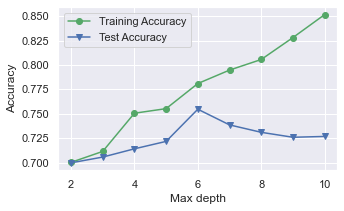

In [43]:
maxdepths = [2,3,4,5,6,7,8,9,10]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros (len(maxdepths))

index  = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    clf = clf.fit(X_train, y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, Y_predTrain)
    testAcc[index] = accuracy_score(y_test, Y_predTest)
    index += 1

#Plot of training and test accuracies

plt.plot(maxdepths, trainAcc, 'go-', maxdepths, testAcc, 'bv-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

Comment:
    it can be seen that at maximum dept 5,  difference in accuracy in test and training sets are low, while maintaining decent accuacy
    Hence, we take maximum dept of 5 as a parameter of the decision tree model. 

#### Model Training 

In [44]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 6)
clf = clf.fit(X_train,y_train)

#### Decision Tree model in Graph

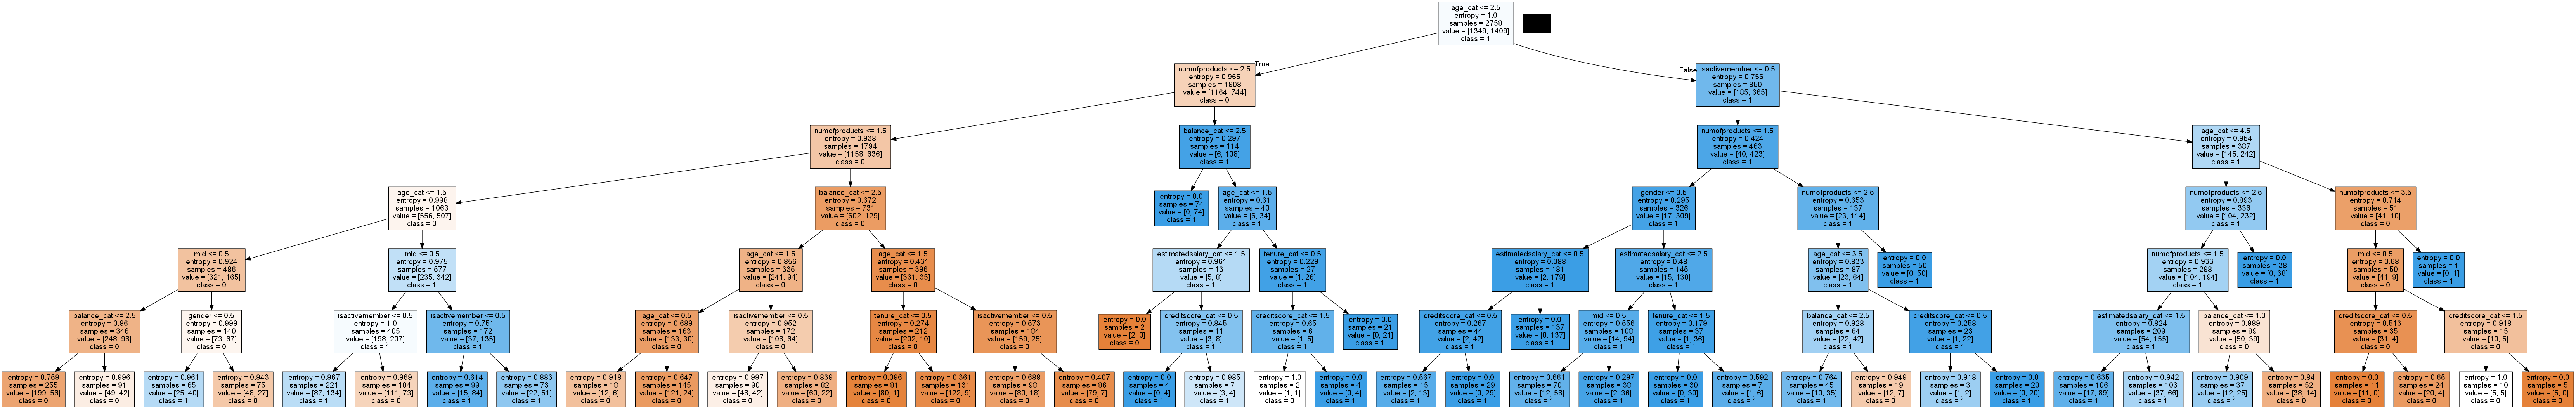

In [45]:
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(clf, feature_names = X.columns, class_names=['0', '1'], 
                                filled = True, out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### Checking Training ACCURACY 

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
y_pred_train = clf.predict(X_train)
print ('Accuracy on training set is %.2f' % (accuracy_score(y_train, y_pred_train)))

Accuracy on training set is 0.78


### Decision Tree Model Validation and Testing 

In [48]:
val_y = val_set['exited']
val_X = val_set.drop(['exited'], axis = 1)

predv = clf.predict(val_X)
predicted_v = pd.Series(predv, name = 'Predicted Class')
predicted_v.reset_index(drop = True, inplace = True)
val_X.reset_index(drop = True, inplace = True)

predicted_v = pd.DataFrame(val_X).join(predicted_v)
predicted_v.head(5)

,gender,numofproducts,hascrcard,isactivemember,age_cat,creditscore_cat,estimatedsalary_cat,balance_cat,tenure_cat,east,mid,Predicted Class
0,0,2,1,1,3,1,2,0,1,0,1,1
1,0,1,0,1,2,0,3,2,0,1,0,0
2,1,2,1,1,5,1,3,0,1,1,0,0
3,1,2,1,0,1,3,2,3,0,1,0,0
4,1,1,1,0,3,0,3,3,1,1,0,1


#### Checking Validation ACCURACY

In [49]:
print ('Accuracy on validating set is %.2f' % (accuracy_score(val_y, predv)))

Accuracy on validating set is 0.72


#### Application of Decision Tree on test data to predict their classification

In [50]:
predy = clf.predict(X_test)
#type(predy)
predicted = pd.Series(predy, name = 'Predicted Class')
predicted.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)

predicted1 = pd.DataFrame(X_test).join(predicted)
predicted1.head(5)


,gender,numofproducts,hascrcard,isactivemember,age_cat,creditscore_cat,estimatedsalary_cat,balance_cat,tenure_cat,east,mid,Predicted Class
0,0,2,1,0,1,2,1,3,1,1,0,0
1,1,1,1,0,1,3,0,2,2,0,1,0
2,1,2,1,1,2,3,0,0,0,0,1,0
3,0,1,1,0,2,3,1,3,0,1,0,1
4,0,1,1,0,2,3,2,2,2,0,1,1


In [51]:
predicted.value_counts()

0    618
1    564
Name: Predicted Class, dtype: int64

#### Checking Test ACCURACY 

In [52]:
print ('Accuracy on test data is %.2f' % (accuracy_score(y_test, predy)))

Accuracy on test data is 0.75


### Confusion Matrix

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [54]:
colnames = ['P_Not-Churned', "P_Churned"]
pd.DataFrame(confusion_matrix(y_test, predy), columns = colnames)

,P_Not-Churned,P_Churned
0,462,137
1,156,427


In [55]:
matrix = classification_report(y_test, predy)
print ('Classification report : \n', matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.75      0.77      0.76       599
           1       0.76      0.73      0.74       583

    accuracy                           0.75      1182
   macro avg       0.75      0.75      0.75      1182
weighted avg       0.75      0.75      0.75      1182



Comments:
    with the balanced-class dataset, the recall is good and the precision and accuracy are also decent. 

### Predicted Dataframe with all class 1

In [145]:
predicted = pd.Series(y_test, name = 'PredictedClass')
predicted.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)

predicted_df = pd.DataFrame(X_test).join(predicted)
#predicted_df = predicted_df[predicted_df.PredictedClass == 1]
predicted_df.head(10)

,gender,numofproducts,hascrcard,isactivemember,age_cat,creditscore_cat,estimatedsalary_cat,balance_cat,tenure_cat,east,mid,PredictedClass
0,0,2,1,0,1,2,1,3,1,1,0,0
1,1,1,1,0,1,3,0,2,2,0,1,0
2,1,2,1,1,2,3,0,0,0,0,1,0
3,0,1,1,0,2,3,1,3,0,1,0,1
4,0,1,1,0,2,3,2,2,2,0,1,1
5,0,2,0,1,4,1,3,3,2,1,0,1
6,0,2,0,0,1,3,3,0,0,1,0,1
7,1,1,1,0,2,3,3,2,1,1,0,1
8,1,2,0,1,3,3,3,3,0,1,0,0
9,1,1,1,1,2,2,0,0,0,0,1,0


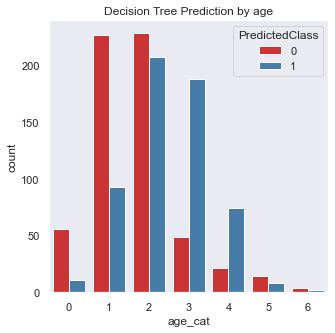

In [146]:
sns.countplot(x ='age_cat', hue = "PredictedClass", data = predicted_df, palette = "Set1")
plt.title ('Decision Tree Prediction by age')
plt.grid(False)
plt.show(block  = False)

# Naive Bayes 

In [57]:
# creating a Gaussian Classifier 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

### Model Training

In [58]:
gnb.fit(X_train, y_train)

GaussianNB()

#### Checking Training ACCURACY

In [59]:
y_train_predict = gnb.predict(X_train)
#train_accuracy = accuracy_score(y_train, y_train_predict)
print ('Accuracy on training data based on GNB is %.2f' % (accuracy_score(y_train, y_train_predict)))

Accuracy on training data based on GNB is 0.72


### Model Validating 

In [60]:
predv_g = gnb.predict(val_X)
predicted_v_g = pd.Series(predv_g, name = 'Predicted Class')
predicted_v_g.reset_index(drop = True, inplace = True)
val_X.reset_index(drop = True, inplace = True)

predicted_v_g = pd.DataFrame(val_X).join(predicted_v_g)
predicted_v_g.head(5)

,gender,numofproducts,hascrcard,isactivemember,age_cat,creditscore_cat,estimatedsalary_cat,balance_cat,tenure_cat,east,mid,Predicted Class
0,0,2,1,1,3,1,2,0,1,0,1,1
1,0,1,0,1,2,0,3,2,0,1,0,0
2,1,2,1,1,5,1,3,0,1,1,0,1
3,1,2,1,0,1,3,2,3,0,1,0,0
4,1,1,1,0,3,0,3,3,1,1,0,0


#### Checking Validation ACCURACY

In [61]:
print ('Accuracy on validation data based on GNB is %.2f' % (accuracy_score(val_y, predv_g)))

Accuracy on validation data based on GNB is 0.61


## Application of Naive Bayes on test data to predict their classification

In [152]:
predy_t = gnb.predict(X_test)
predicted_t_g = pd.Series(predy_t, name = 'Predicted Class')
predicted_t_g.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)

predicted_t_g = pd.DataFrame(X_test).join(predicted_t_g)
predicted_t_g.head()


,gender,numofproducts,hascrcard,isactivemember,age_cat,creditscore_cat,estimatedsalary_cat,balance_cat,tenure_cat,east,mid,Predicted Class
0,0,2,1,0,1,2,1,3,1,1,0,0
1,1,1,1,0,1,3,0,2,2,0,1,1
2,1,2,1,1,2,3,0,0,0,0,1,1
3,0,1,1,0,2,3,1,3,0,1,0,0
4,0,1,1,0,2,3,2,2,2,0,1,1


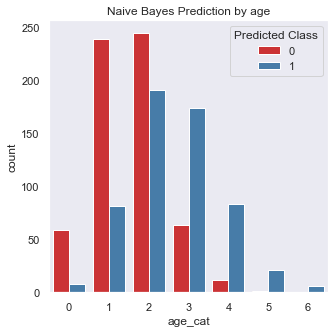

In [153]:
sns.countplot(x ='age_cat', hue = "Predicted Class", data = predicted_t_g, palette = "Set1")
plt.title ('Naive Bayes Prediction by age')
plt.grid(False)
plt.show(block  = False)

#### Checking Test Accuracy

In [63]:
print ('Accuracy on test data based on GNB is %.2f' % (accuracy_score(y_test, predy_t)))

Accuracy on test data based on GNB is 0.70


### Confusion Matrix 

In [64]:
confusion_matrix(y_test, predy_t)

array([[434, 165],
       [184, 399]], dtype=int64)

In [65]:
matrix = classification_report(y_test, predy_t)
print ('Classification report : \n', matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       599
           1       0.71      0.68      0.70       583

    accuracy                           0.70      1182
   macro avg       0.70      0.70      0.70      1182
weighted avg       0.70      0.70      0.70      1182



# XG BOOST 

In [66]:
# import library
import xgboost as xgb

Instantiate XGBoost Classifier 

In [67]:
xgb_clf = xgb.XGBClassifier(randomstate = 42)

#### Examining the parameters

In [68]:
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'randomstate': 42}

#### Let us describe some importrant parameters

1. objective parameters is used to determine the target variables, so the binary:logistic as a default parameter calculates the probability of the particular class and if the probability is greater than 0.5 then classifies the y variable as 1 else 0
    
2. booster parameters is used for the type of model, in this case we use decision tree (gbtree)
3. n_estimators is the number of gbtrees we want to use. 
4. eval_metric is for measuring the performance of each trees, we use error in this case
5. gamma is use to making the decision to prune the trees, higher the gamma, simpler the model will be
6. max_dept  is maximum number of the nodes we use in the decision trees
7. reg_alpha is parameters for regularization
8. learning_rate : it is used to set how quickly the decision trees learn

### Hyperparameters Tuning with Random Search

In [69]:
# import Randomsearch library
from sklearn.model_selection import RandomizedSearchCV

#### Define a parameter grid

In [70]:
rs_param_grid ={
    "max_depth": list((range(3,10))),
    "alpha" : [0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80],
    
    "subsample":np.linspace(0.6, 1, 100),
    "learning_rate":np.linspace(0.10, 1, 100),
    "n_estimators" : list((range(10,100))),
    "gamma": np.linspace(0.5, 3, 10)

}


#### Instantiating XGB Clsassifier 

In [71]:
xgb_clf = xgb.XGBClassifier(eval_metric = 'error', random_state = 42) 

#### Instantiate RandomSearchCV

In [72]:
xgb_rs= RandomizedSearchCV(estimator = xgb_clf, 
                           param_distributions = rs_param_grid, cv = 10,
                           n_iter = 10,
                           verbose = 2, random_state= 42)

#### Model Training 

In [73]:
xgb_rs.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END alpha=0.5, gamma=0.7777777777777778, learning_rate=0.7636363636363636, max_depth=3, n_estimators=25, subsample=0.9838383838383837; total time=   0.0s
[CV] END alpha=0.5, gamma=0.7777777777777778, learning_rate=0.7636363636363636, max_depth=3, n_estimators=25, subsample=0.9838383838383837; total time=   0.0s
[CV] END alpha=0.5, gamma=0.7777777777777778, learning_rate=0.7636363636363636, max_depth=3, n_estimators=25, subsample=0.9838383838383837; total time=   0.0s
[CV] END alpha=0.5, gamma=0.7777777777777778, learning_rate=0.7636363636363636, max_depth=3, n_estimators=25, subsample=0.9838383838383837; total time=   0.0s
[CV] END alpha=0.5, gamma=0.7777777777777778, learning_rate=0.7636363636363636, max_depth=3, n_estimators=25, subsample=0.9838383838383837; total time=   0.0s
[CV] END alpha=0.5, gamma=0.7777777777777778, learning_rate=0.7636363636363636, max_depth=3, n_estimators=25, subsample=0.9838383838383837; to

C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sk

[CV] END alpha=0.5, gamma=0.7777777777777778, learning_rate=0.7636363636363636, max_depth=3, n_estimators=25, subsample=0.9838383838383837; total time=   0.0s
[CV] END alpha=0.5, gamma=0.7777777777777778, learning_rate=0.7636363636363636, max_depth=3, n_estimators=25, subsample=0.9838383838383837; total time=   0.0s
[CV] END alpha=0.7, gamma=0.7777777777777778, learning_rate=0.6545454545454545, max_depth=8, n_estimators=34, subsample=0.9717171717171718; total time=   0.0s
[CV] END alpha=0.7, gamma=0.7777777777777778, learning_rate=0.6545454545454545, max_depth=8, n_estimators=34, subsample=0.9717171717171718; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sk

[CV] END alpha=0.7, gamma=0.7777777777777778, learning_rate=0.6545454545454545, max_depth=8, n_estimators=34, subsample=0.9717171717171718; total time=   0.0s
[CV] END alpha=0.7, gamma=0.7777777777777778, learning_rate=0.6545454545454545, max_depth=8, n_estimators=34, subsample=0.9717171717171718; total time=   0.0s
[CV] END alpha=0.7, gamma=0.7777777777777778, learning_rate=0.6545454545454545, max_depth=8, n_estimators=34, subsample=0.9717171717171718; total time=   0.0s
[CV] END alpha=0.7, gamma=0.7777777777777778, learning_rate=0.6545454545454545, max_depth=8, n_estimators=34, subsample=0.9717171717171718; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sk

[CV] END alpha=0.7, gamma=0.7777777777777778, learning_rate=0.6545454545454545, max_depth=8, n_estimators=34, subsample=0.9717171717171718; total time=   0.0s
[CV] END alpha=0.7, gamma=0.7777777777777778, learning_rate=0.6545454545454545, max_depth=8, n_estimators=34, subsample=0.9717171717171718; total time=   0.0s
[CV] END alpha=0.7, gamma=0.7777777777777778, learning_rate=0.6545454545454545, max_depth=8, n_estimators=34, subsample=0.9717171717171718; total time=   0.0s
[CV] END alpha=0.7, gamma=0.7777777777777778, learning_rate=0.6545454545454545, max_depth=8, n_estimators=34, subsample=0.9717171717171718; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sk

[CV] END alpha=0.5, gamma=3.0, learning_rate=0.8545454545454545, max_depth=8, n_estimators=25, subsample=0.6080808080808081; total time=   0.0s
[CV] END alpha=0.5, gamma=3.0, learning_rate=0.8545454545454545, max_depth=8, n_estimators=25, subsample=0.6080808080808081; total time=   0.0s
[CV] END alpha=0.5, gamma=3.0, learning_rate=0.8545454545454545, max_depth=8, n_estimators=25, subsample=0.6080808080808081; total time=   0.0s
[CV] END alpha=0.5, gamma=3.0, learning_rate=0.8545454545454545, max_depth=8, n_estimators=25, subsample=0.6080808080808081; total time=   0.0s
[CV] END alpha=0.5, gamma=3.0, learning_rate=0.8545454545454545, max_depth=8, n_estimators=25, subsample=0.6080808080808081; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sk

[CV] END alpha=0.5, gamma=3.0, learning_rate=0.8545454545454545, max_depth=8, n_estimators=25, subsample=0.6080808080808081; total time=   0.0s
[CV] END alpha=0.5, gamma=3.0, learning_rate=0.8545454545454545, max_depth=8, n_estimators=25, subsample=0.6080808080808081; total time=   0.0s
[CV] END alpha=0.5, gamma=3.0, learning_rate=0.8545454545454545, max_depth=8, n_estimators=25, subsample=0.6080808080808081; total time=   0.0s
[CV] END alpha=0.5, gamma=3.0, learning_rate=0.8545454545454545, max_depth=8, n_estimators=25, subsample=0.6080808080808081; total time=   0.0s
[CV] END alpha=0.5, gamma=3.0, learning_rate=0.8545454545454545, max_depth=8, n_estimators=25, subsample=0.6080808080808081; total time=   0.0s
[CV] END alpha=0.4, gamma=0.5, learning_rate=0.3181818181818182, max_depth=4, n_estimators=18, subsample=0.8545454545454545; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sk

[CV] END alpha=0.4, gamma=0.5, learning_rate=0.3181818181818182, max_depth=4, n_estimators=18, subsample=0.8545454545454545; total time=   0.0s
[CV] END alpha=0.4, gamma=0.5, learning_rate=0.3181818181818182, max_depth=4, n_estimators=18, subsample=0.8545454545454545; total time=   0.0s
[CV] END alpha=0.4, gamma=0.5, learning_rate=0.3181818181818182, max_depth=4, n_estimators=18, subsample=0.8545454545454545; total time=   0.0s
[CV] END alpha=0.4, gamma=0.5, learning_rate=0.3181818181818182, max_depth=4, n_estimators=18, subsample=0.8545454545454545; total time=   0.0s
[CV] END alpha=0.4, gamma=0.5, learning_rate=0.3181818181818182, max_depth=4, n_estimators=18, subsample=0.8545454545454545; total time=   0.0s
[CV] END alpha=0.4, gamma=0.5, learning_rate=0.3181818181818182, max_depth=4, n_estimators=18, subsample=0.8545454545454545; total time=   0.0s
[CV] END alpha=0.4, gamma=0.5, learning_rate=0.3181818181818182, max_depth=4, n_estimators=18, subsample=0.8545454545454545; total time=

C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.8, gamma=2.4444444444444446, learning_rate=0.32727272727272727, max_depth=9, n_estimators=69, subsample=0.8909090909090909; total time=   0.0s
[CV] END alpha=0.8, gamma=2.4444444444444446, learning_rate=0.32727272727272727, max_depth=9, n_estimators=69, subsample=0.8909090909090909; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.8, gamma=2.4444444444444446, learning_rate=0.32727272727272727, max_depth=9, n_estimators=69, subsample=0.8909090909090909; total time=   0.0s
[CV] END alpha=0.8, gamma=2.4444444444444446, learning_rate=0.32727272727272727, max_depth=9, n_estimators=69, subsample=0.8909090909090909; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.8, gamma=2.4444444444444446, learning_rate=0.32727272727272727, max_depth=9, n_estimators=69, subsample=0.8909090909090909; total time=   0.0s
[CV] END alpha=0.8, gamma=2.4444444444444446, learning_rate=0.32727272727272727, max_depth=9, n_estimators=69, subsample=0.8909090909090909; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.8, gamma=2.4444444444444446, learning_rate=0.32727272727272727, max_depth=9, n_estimators=69, subsample=0.8909090909090909; total time=   0.0s
[CV] END alpha=0.8, gamma=2.4444444444444446, learning_rate=0.32727272727272727, max_depth=9, n_estimators=69, subsample=0.8909090909090909; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.8, gamma=2.166666666666667, learning_rate=0.1181818181818182, max_depth=7, n_estimators=72, subsample=0.907070707070707; total time=   0.0s
[CV] END alpha=0.8, gamma=2.166666666666667, learning_rate=0.1181818181818182, max_depth=7, n_estimators=72, subsample=0.907070707070707; total time=   0.0s
[CV] END alpha=0.8, gamma=2.166666666666667, learning_rate=0.1181818181818182, max_depth=7, n_estimators=72, subsample=0.907070707070707; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sk

[CV] END alpha=0.8, gamma=2.166666666666667, learning_rate=0.1181818181818182, max_depth=7, n_estimators=72, subsample=0.907070707070707; total time=   0.0s
[CV] END alpha=0.8, gamma=2.166666666666667, learning_rate=0.1181818181818182, max_depth=7, n_estimators=72, subsample=0.907070707070707; total time=   0.0s
[CV] END alpha=0.8, gamma=2.166666666666667, learning_rate=0.1181818181818182, max_depth=7, n_estimators=72, subsample=0.907070707070707; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sk

[CV] END alpha=0.8, gamma=2.166666666666667, learning_rate=0.1181818181818182, max_depth=7, n_estimators=72, subsample=0.907070707070707; total time=   0.0s
[CV] END alpha=0.8, gamma=2.166666666666667, learning_rate=0.1181818181818182, max_depth=7, n_estimators=72, subsample=0.907070707070707; total time=   0.0s
[CV] END alpha=0.8, gamma=2.166666666666667, learning_rate=0.1181818181818182, max_depth=7, n_estimators=72, subsample=0.907070707070707; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sk

[CV] END alpha=0.8, gamma=2.166666666666667, learning_rate=0.1181818181818182, max_depth=7, n_estimators=72, subsample=0.907070707070707; total time=   0.0s
[CV] END alpha=0.4, gamma=0.7777777777777778, learning_rate=0.22727272727272727, max_depth=7, n_estimators=70, subsample=0.7535353535353535; total time=   0.0s
[CV] END alpha=0.4, gamma=0.7777777777777778, learning_rate=0.22727272727272727, max_depth=7, n_estimators=70, subsample=0.7535353535353535; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sk

[CV] END alpha=0.4, gamma=0.7777777777777778, learning_rate=0.22727272727272727, max_depth=7, n_estimators=70, subsample=0.7535353535353535; total time=   0.0s
[CV] END alpha=0.4, gamma=0.7777777777777778, learning_rate=0.22727272727272727, max_depth=7, n_estimators=70, subsample=0.7535353535353535; total time=   0.0s
[CV] END alpha=0.4, gamma=0.7777777777777778, learning_rate=0.22727272727272727, max_depth=7, n_estimators=70, subsample=0.7535353535353535; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.4, gamma=0.7777777777777778, learning_rate=0.22727272727272727, max_depth=7, n_estimators=70, subsample=0.7535353535353535; total time=   0.0s
[CV] END alpha=0.4, gamma=0.7777777777777778, learning_rate=0.22727272727272727, max_depth=7, n_estimators=70, subsample=0.7535353535353535; total time=   0.0s
[CV] END alpha=0.4, gamma=0.7777777777777778, learning_rate=0.22727272727272727, max_depth=7, n_estimators=70, subsample=0.7535353535353535; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.4, gamma=0.7777777777777778, learning_rate=0.22727272727272727, max_depth=7, n_estimators=70, subsample=0.7535353535353535; total time=   0.0s
[CV] END alpha=0.4, gamma=0.7777777777777778, learning_rate=0.22727272727272727, max_depth=7, n_estimators=70, subsample=0.7535353535353535; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.6, gamma=2.7222222222222223, learning_rate=0.3545454545454545, max_depth=9, n_estimators=73, subsample=0.9111111111111111; total time=   0.0s
[CV] END alpha=0.6, gamma=2.7222222222222223, learning_rate=0.3545454545454545, max_depth=9, n_estimators=73, subsample=0.9111111111111111; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.6, gamma=2.7222222222222223, learning_rate=0.3545454545454545, max_depth=9, n_estimators=73, subsample=0.9111111111111111; total time=   0.1s
[CV] END alpha=0.6, gamma=2.7222222222222223, learning_rate=0.3545454545454545, max_depth=9, n_estimators=73, subsample=0.9111111111111111; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.6, gamma=2.7222222222222223, learning_rate=0.3545454545454545, max_depth=9, n_estimators=73, subsample=0.9111111111111111; total time=   0.1s
[CV] END alpha=0.6, gamma=2.7222222222222223, learning_rate=0.3545454545454545, max_depth=9, n_estimators=73, subsample=0.9111111111111111; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.6, gamma=2.7222222222222223, learning_rate=0.3545454545454545, max_depth=9, n_estimators=73, subsample=0.9111111111111111; total time=   0.0s
[CV] END alpha=0.6, gamma=2.7222222222222223, learning_rate=0.3545454545454545, max_depth=9, n_estimators=73, subsample=0.9111111111111111; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.6, gamma=2.7222222222222223, learning_rate=0.3545454545454545, max_depth=9, n_estimators=73, subsample=0.9111111111111111; total time=   0.0s
[CV] END alpha=0.6, gamma=2.7222222222222223, learning_rate=0.3545454545454545, max_depth=9, n_estimators=73, subsample=0.9111111111111111; total time=   0.0s
[CV] END alpha=0.4, gamma=0.7777777777777778, learning_rate=0.2181818181818182, max_depth=3, n_estimators=24, subsample=0.8666666666666667; total time=   0.0s
[CV] END alpha=0.4, gamma=0.7777777777777778, learning_rate=0.2181818181818182, max_depth=3, n_estimators=24, subsample=0.8666666666666667; total time=   0.0s
[CV] END alpha=0.4, gamma=0.7777777777777778, learning_rate=0.2181818181818182, max_depth=3, n_estimators=24, subsample=0.8666666666666667; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sk

[CV] END alpha=0.4, gamma=0.7777777777777778, learning_rate=0.2181818181818182, max_depth=3, n_estimators=24, subsample=0.8666666666666667; total time=   0.0s
[CV] END alpha=0.4, gamma=0.7777777777777778, learning_rate=0.2181818181818182, max_depth=3, n_estimators=24, subsample=0.8666666666666667; total time=   0.0s
[CV] END alpha=0.4, gamma=0.7777777777777778, learning_rate=0.2181818181818182, max_depth=3, n_estimators=24, subsample=0.8666666666666667; total time=   0.0s
[CV] END alpha=0.4, gamma=0.7777777777777778, learning_rate=0.2181818181818182, max_depth=3, n_estimators=24, subsample=0.8666666666666667; total time=   0.0s
[CV] END alpha=0.4, gamma=0.7777777777777778, learning_rate=0.2181818181818182, max_depth=3, n_estimators=24, subsample=0.8666666666666667; total time=   0.0s
[CV] END alpha=0.4, gamma=0.7777777777777778, learning_rate=0.2181818181818182, max_depth=3, n_estimators=24, subsample=0.8666666666666667; total time=   0.0s
[CV] END alpha=0.4, gamma=0.7777777777777778, 

C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sk

[CV] END alpha=0.8, gamma=2.7222222222222223, learning_rate=0.23636363636363636, max_depth=7, n_estimators=90, subsample=0.6565656565656566; total time=   0.0s
[CV] END alpha=0.8, gamma=2.7222222222222223, learning_rate=0.23636363636363636, max_depth=7, n_estimators=90, subsample=0.6565656565656566; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.8, gamma=2.7222222222222223, learning_rate=0.23636363636363636, max_depth=7, n_estimators=90, subsample=0.6565656565656566; total time=   0.0s
[CV] END alpha=0.8, gamma=2.7222222222222223, learning_rate=0.23636363636363636, max_depth=7, n_estimators=90, subsample=0.6565656565656566; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.8, gamma=2.7222222222222223, learning_rate=0.23636363636363636, max_depth=7, n_estimators=90, subsample=0.6565656565656566; total time=   0.0s
[CV] END alpha=0.8, gamma=2.7222222222222223, learning_rate=0.23636363636363636, max_depth=7, n_estimators=90, subsample=0.6565656565656566; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.8, gamma=2.7222222222222223, learning_rate=0.23636363636363636, max_depth=7, n_estimators=90, subsample=0.6565656565656566; total time=   0.0s
[CV] END alpha=0.8, gamma=2.7222222222222223, learning_rate=0.23636363636363636, max_depth=7, n_estimators=90, subsample=0.6565656565656566; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.8, gamma=2.7222222222222223, learning_rate=0.23636363636363636, max_depth=7, n_estimators=90, subsample=0.6565656565656566; total time=   0.0s
[CV] END alpha=0.8, gamma=2.7222222222222223, learning_rate=0.23636363636363636, max_depth=7, n_estimators=90, subsample=0.6565656565656566; total time=   0.0s


C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='error', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan...
       0.86262626, 0.86666667, 0.87070707, 0.87474747, 0.87878788,
       0.88282828, 0.88686869, 0.89090909, 0.89494949, 0.8989899 ,
       0.9030303 , 0.90707071, 0.91111111, 0.91

#### Printing Best Parameters 

In [74]:
print ("the best parameters are:", xgb_rs.best_params_)

the best parameters are: {'subsample': 0.8666666666666667, 'n_estimators': 24, 'max_depth': 3, 'learning_rate': 0.2181818181818182, 'gamma': 0.7777777777777778, 'alpha': 0.4}


In [75]:
xgb_clf = xgb.XGBClassifier(eval_metric = 'error', random_state = 42, subsample=0.8545454545454545,
                            n_estimators=18, max_depth=4, learning_rate=0.3181818181818182, gamma=0.5,
                            alpha=0.4)

In [76]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=0.4, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0.5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3181818181818182,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=18, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0.400000006, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8545454545454545, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [77]:
xgb_rs.best_score_

0.7733899868247696

#### Prediction on Test set 

In [78]:
preds = xgb_clf.predict(X_test)

#### Accuracy on Testset 

In [79]:
print ('Accuracy on test data based on XGBoost is %.2f' % (accuracy_score(y_test, preds)))

Accuracy on test data based on XGBoost is 0.75


### Confusion Matrix

In [80]:
confusion_matrix(y_test, preds)

array([[446, 153],
       [143, 440]], dtype=int64)

In [81]:
collnames = ['P_Not-Churned', "P_Churned"]
pd.DataFrame(confusion_matrix(y_test, preds), columns = colnames)

,P_Not-Churned,P_Churned
0,446,153
1,143,440


In [82]:
matrix = classification_report(y_test, preds)
print('the Classification report based on XGBoost Model \n', matrix)

the Classification report based on XGBoost Model 
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       599
           1       0.74      0.75      0.75       583

    accuracy                           0.75      1182
   macro avg       0.75      0.75      0.75      1182
weighted avg       0.75      0.75      0.75      1182



## Feature Importance Plot 

Text(0.5, 1.0, 'Feature importance by number of appearence')

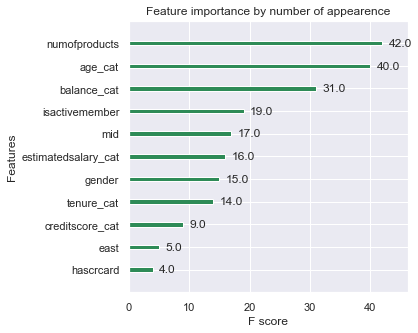

In [83]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (5,5)
xgb.plot_importance(xgb_clf, color = 'seagreen')
plt.title('Feature importance by number of appearence')

Text(0.5, 1.0, 'Feature importance by gain')

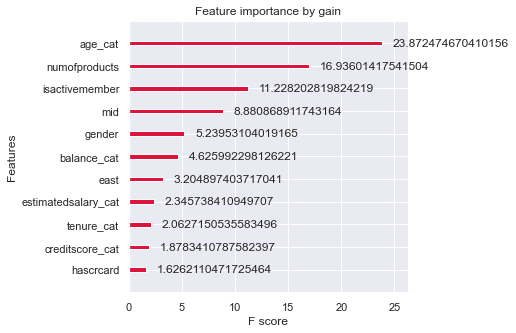

In [164]:
from matplotlib.ticker import FormatStrFormatter
matplotlib.rcParams['figure.figsize'] = (5,5)
xgb.plot_importance(xgb_clf, importance_type = "gain", color = 'crimson') 
plt.title('Feature importance by gain')
#round(importance[key],2)

### Visualization of the final Decision Tree of XGBoost Model 

<AxesSubplot:>

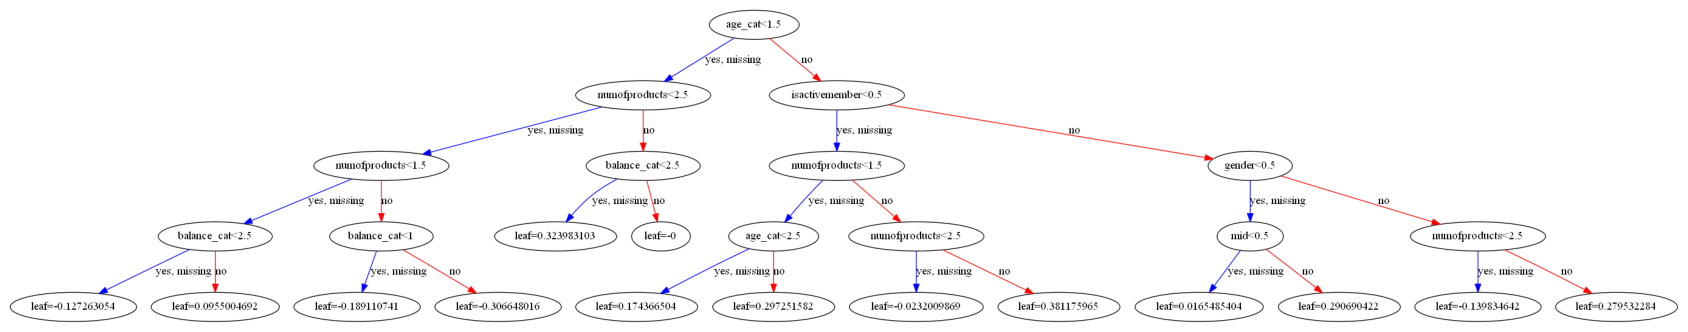

In [85]:
matplotlib.rcParams['figure.figsize'] = (30,30)
xgb.plot_tree(xgb_clf, num_trees= 3)


In [86]:
xgb_prediction_df = pd.Series(preds, name = 'exited_prediction')
xgb_prediction_df.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)

post_prediction_df = pd.DataFrame(X_test).join(xgb_prediction_df)
post_prediction_df.head(5)

,gender,numofproducts,hascrcard,isactivemember,age_cat,creditscore_cat,estimatedsalary_cat,balance_cat,tenure_cat,east,mid,exited_prediction
0,0,2,1,0,1,2,1,3,1,1,0,0
1,1,1,1,0,1,3,0,2,2,0,1,0
2,1,2,1,1,2,3,0,0,0,0,1,0
3,0,1,1,0,2,3,1,3,0,1,0,1
4,0,1,1,0,2,3,2,2,2,0,1,1


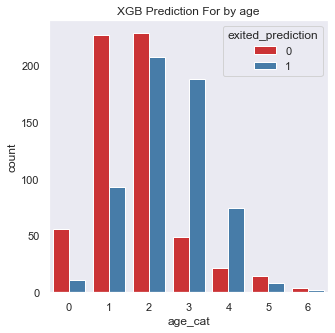

In [143]:
sns.countplot(x ='age_cat', hue = "exited_prediction", data = post_prediction_df, palette = "Set1")
plt.title ('XGB Prediction by age')
plt.grid(False)
plt.show(block  = False)

# ANN Methodology

## Model Training

In [87]:
import tensorflow as tf
from tensorflow import keras

# currently, the model has 11 nodes in its input layer, matching the number of columns in our balanced dataframe
# this number can be tweaked but will affect its performance
model = keras.Sequential([
    keras.layers.Dense(11, input_shape=(11,), activation='relu'), # input layer
    keras.layers.Dense(1, activation='sigmoid') # output layer
])

# we are using adam optimizer because of its optimized algorithm, fast computational times, and project fit. 
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
87/87 [==============================] - 0s 378us/step - loss: 0.6617 - accuracy: 0.6164
Epoch 2/50
87/87 [==============================] - 0s 401us/step - loss: 0.6151 - accuracy: 0.6672
Epoch 3/50
87/87 [==============================] - 0s 379us/step - loss: 0.5946 - accuracy: 0.6875
Epoch 4/50
87/87 [==============================] - 0s 344us/step - loss: 0.5827 - accuracy: 0.7074
Epoch 5/50
87/87 [==============================] - 0s 390us/step - loss: 0.5760 - accuracy: 0.7096
Epoch 6/50
87/87 [==============================] - 0s 390us/step - loss: 0.5714 - accuracy: 0.7103
Epoch 7/50
87/87 [==============================] - 0s 378us/step - loss: 0.5680 - accuracy: 0.7157
Epoch 8/50
87/87 [==============================] - 0s 367us/step - loss: 0.5654 - accuracy: 0.7154
Epoch 9/50
87/87 [==============================] - 0s 367us/step - loss: 0.5638 - accuracy: 0.7136
Epoch 10/50
87/87 [==============================] - 0s 367us/step - loss: 0.5611 - accuracy: 0.7186

## Model Evaluation

In [88]:
model.evaluate(X_test, y_test)

37/37 [==============================] - 0s 377us/step - loss: 0.5239 - accuracy: 0.7352


[0.5238631963729858, 0.7351945638656616]

## Model Testing

In [89]:
# yp = y-predictor
yp = model.predict(X_test)
yp[:100]

array([[0.19628167],
       [0.57653904],
       [0.4575742 ],
       [0.8132638 ],
       [0.8962847 ],
       [0.37087744],
       [0.55480117],
       [0.59739673],
       [0.12123337],
       [0.5074688 ],
       [0.6074472 ],
       [0.71295416],
       [0.37932354],
       [0.9256967 ],
       [0.5516616 ],
       [0.24055853],
       [0.82127166],
       [0.16906789],
       [0.24432272],
       [0.4580742 ],
       [0.6426894 ],
       [0.839092  ],
       [0.9493141 ],
       [0.8775202 ],
       [0.40753534],
       [0.81041455],
       [0.67647946],
       [0.57888156],
       [0.42721424],
       [0.30458796],
       [0.07600257],
       [0.6561602 ],
       [0.4649063 ],
       [0.72702813],
       [0.562845  ],
       [0.787323  ],
       [0.23335698],
       [0.754062  ],
       [0.37342632],
       [0.9449243 ],
       [0.6769035 ],
       [0.27930492],
       [0.75809544],
       [0.41758668],
       [0.9432452 ],
       [0.14544985],
       [0.394484  ],
       [0.494

In [90]:
# if exited's value is greater than 0.5, append 1 to list (customer churned)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [91]:
y_pred[:25]

[0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0]

In [92]:
y_test[:25]

0     0
1     0
2     0
3     1
4     1
5     1
6     1
7     1
8     0
9     0
10    1
11    1
12    0
13    1
14    1
15    1
16    1
17    0
18    0
19    0
20    1
21    1
22    1
23    1
24    1
Name: exited, dtype: category
Categories (2, int64): [0, 1]

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       599
           1       0.72      0.75      0.74       583

    accuracy                           0.74      1182
   macro avg       0.74      0.74      0.74      1182
weighted avg       0.74      0.74      0.74      1182



Text(66.5, 0.5, 'Truth')

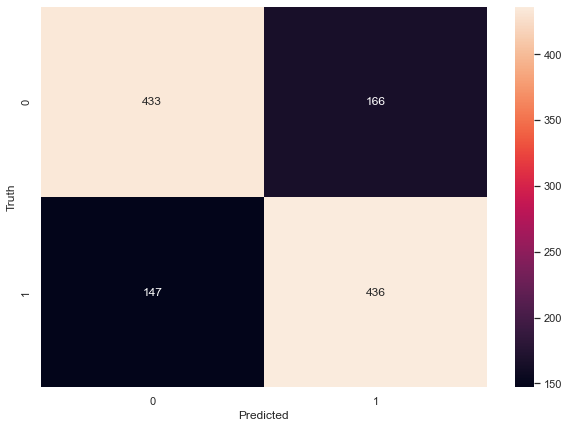

In [94]:
# cm = confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [95]:
ann_prediction_df = pd.Series(y_test, name = 'exited_prediction')
ann_prediction_df.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)

post_prediction_df = pd.DataFrame(X_test).join(ann_prediction_df)
post_prediction_df.head(10)

,gender,numofproducts,hascrcard,isactivemember,age_cat,creditscore_cat,estimatedsalary_cat,balance_cat,tenure_cat,east,mid,exited_prediction
0,0,2,1,0,1,2,1,3,1,1,0,0
1,1,1,1,0,1,3,0,2,2,0,1,0
2,1,2,1,1,2,3,0,0,0,0,1,0
3,0,1,1,0,2,3,1,3,0,1,0,1
4,0,1,1,0,2,3,2,2,2,0,1,1
5,0,2,0,1,4,1,3,3,2,1,0,1
6,0,2,0,0,1,3,3,0,0,1,0,1
7,1,1,1,0,2,3,3,2,1,1,0,1
8,1,2,0,1,3,3,3,3,0,1,0,0
9,1,1,1,1,2,2,0,0,0,0,1,0


# CLUSTERING

Since, most of the clustering algorithms are based on distance measures, numerical data type works best. So we use the intial datasets called churn_df.


In [97]:
churn_df.head()

,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,region,age_cat,creditscore_cat,estimatedsalary_cat,balance_cat,tenure_cat
0,619,Female,42,2,0.00,1,1,1,101348.88,1,east,36_45,medium,high,no,low
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,west,36_45,medium,high,medium,low
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,east,36_45,low,high,high,high
3,699,Female,39,1,0.00,2,0,0,93826.63,0,east,36_45,high,medium,no,low
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,west,36_45,very high,medium,high,low


it can be observerd that the churn_df has lots of columns, many of which are not required, so we will create a new dataframe by dropping all unwanted columns

In [98]:
df_cluster = churn_df.loc[:,churn_df.columns.drop(['age_cat', 'creditscore_cat', 'estimatedsalary_cat','balance_cat',
                                                     'tenure_cat'])]
df_cluster.head()

,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,region
0,619,Female,42,2,0.00,1,1,1,101348.88,1,east
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,west
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,east
3,699,Female,39,1,0.00,2,0,0,93826.63,0,east
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,west


### K-MEANS Clustering 

#### Import required libraries 

In [99]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#### Scaling balance, estimatedsalary, age and creditscore, and tenure to transform to normal. 


#### Instantiation of scaler

In [100]:
scaler = StandardScaler()

In [101]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   creditscore      10000 non-null  int64   
 1   gender           10000 non-null  object  
 2   age              10000 non-null  int64   
 3   tenure           10000 non-null  int64   
 4   balance          10000 non-null  float64 
 5   numofproducts    10000 non-null  int64   
 6   hascrcard        10000 non-null  category
 7   isactivemember   10000 non-null  category
 8   estimatedsalary  10000 non-null  float64 
 9   exited           10000 non-null  category
 10  region           10000 non-null  object  
dtypes: category(3), float64(2), int64(4), object(2)
memory usage: 654.8+ KB


#### creating a dataframe of only numeric columns 

In [102]:
df_num = df_cluster.loc[:,df_cluster.columns.drop(['gender', 'numofproducts', 'hascrcard',
                                                   'isactivemember','exited', 'region'])]

In [103]:
df_cat = df_cluster.loc[:,df_cluster.columns.drop(['creditscore', 'age', 'tenure','balance','estimatedsalary'])]

#### Standard Scale transformation to the variables of df_num

In [104]:
df_num_t = scaler.fit_transform(df_num)
columns = ['creditscore_t', 'age_t', 'tenure_t', 'balance_t', 'estimatedsalary_t']
df_num_t = pd.DataFrame(df_num_t, columns = columns)
df_num_t.head()


,creditscore_t,age_t,tenure_t,balance_t,estimatedsalary_t
0,-0.326221,0.293517,-1.041760,-1.225848,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,0.216534
2,-1.536794,0.293517,1.032908,1.333053,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.365276


Now we have scaled all the  numerical data, so we merge back the all the categorical variable back 



In [105]:
df_cluster_t = pd.DataFrame(df_num_t).join(df_cat)
df_cluster_t = pd.DataFrame(df_cluster_t).join(df_num)
df_cluster_t.head()

,creditscore_t,age_t,tenure_t,balance_t,estimatedsalary_t,gender,numofproducts,hascrcard,isactivemember,exited,region,creditscore,age,tenure,balance,estimatedsalary
0,-0.326221,0.293517,-1.041760,-1.225848,0.021886,Female,1,1,1,1,east,619,42,2,0.00,101348.88
1,-0.440036,0.198164,-1.387538,0.117350,0.216534,Female,1,0,1,0,west,608,41,1,83807.86,112542.58
2,-1.536794,0.293517,1.032908,1.333053,0.240687,Female,3,1,0,1,east,502,42,8,159660.80,113931.57
3,0.501521,0.007457,-1.387538,-1.225848,-0.108918,Female,2,0,0,0,east,699,39,1,0.00,93826.63
4,2.063884,0.388871,-1.041760,0.785728,-0.365276,Female,1,1,1,0,west,850,43,2,125510.82,79084.10


## Cluster Analysis 

### Cluster Analysis age_t

#### Determination of the optimum number of cluster (k), in which the inertia is minimum

In [106]:
inertia_score = list()
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_cluster_t[[ 'age_t']])
    inertia_score.append(kmeans.inertia_)

#### Ploting Inertia score to check the optimum k

Text(0.5, 1.0, 'inertia by number of clusters')

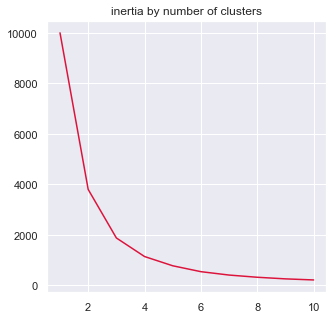

In [107]:
matplotlib.rcParams['figure.figsize'] = (5,5)
plt.plot(range(1,11), inertia_score, color = 'crimson')
plt.title("inertia by number of clusters")

It can be observerd form above elbow plot that the inertia gradually decrease after the 4 so we take k = 4 

#### instantiation of clusturing1 

In [108]:
clustering1 = KMeans(n_clusters  = 4)


#### fitting model 

In [109]:
clustering1.fit(df_cluster_t[['age_t']])

KMeans(n_clusters=4)

#### make age_cluster column in the dataframe

In [110]:
df_cluster_t['age_cluster'] = clustering1.labels_
df_cluster_t.head()

,creditscore_t,age_t,tenure_t,balance_t,estimatedsalary_t,gender,numofproducts,hascrcard,isactivemember,exited,region,creditscore,age,tenure,balance,estimatedsalary,age_cluster
0,-0.326221,0.293517,-1.041760,-1.225848,0.021886,Female,1,1,1,1,east,619,42,2,0.00,101348.88,0
1,-0.440036,0.198164,-1.387538,0.117350,0.216534,Female,1,0,1,0,west,608,41,1,83807.86,112542.58,0
2,-1.536794,0.293517,1.032908,1.333053,0.240687,Female,3,1,0,1,east,502,42,8,159660.80,113931.57,0
3,0.501521,0.007457,-1.387538,-1.225848,-0.108918,Female,2,0,0,0,east,699,39,1,0.00,93826.63,0
4,2.063884,0.388871,-1.041760,0.785728,-0.365276,Female,1,1,1,0,west,850,43,2,125510.82,79084.10,1


In [111]:
df_cluster_t['age_cluster'].value_counts()

0    4316
3    2790
1    2094
2     800
Name: age_cluster, dtype: int64

#### Descriptive Analysis based in age cluster

In [112]:
df_cluster_t.groupby('age_cluster')['creditscore', 'tenure', 'balance', 'estimatedsalary'].mean()

C:\Users\deyoz\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,creditscore,tenure,balance,estimatedsalary
age_cluster,,,,
0,650.863068,5.009036,75682.784124,99785.482544
1,647.628940,5.005253,80989.456495,101542.466485
2,652.430000,4.907500,78025.304050,96209.067537
3,651.643011,5.054480,73906.749627,100584.615520


Comment:
summary analysis by age_cluster is not giving us any usefulinformation

## Bivariate Cluster 


#### Cluster Analysis age and Tenure 

#### determination of k in which the intertia stabilizes

Text(0.5, 1.0, 'inertia by number of clusters for age and tenure')

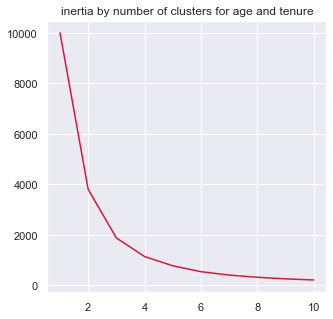

In [113]:
intertia_score1 = list()
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_cluster_t[['age_t', 'tenure_t']])
    intertia_score1.append(kmeans.inertia_)
#plotting inertia to check the optimum k
matplotlib.rcParams['figure.figsize'] = (5,5)
plt.plot(range(1,11), inertia_score, color = 'crimson')
plt.title("inertia by number of clusters for age and tenure")

comment: we will take k = 4, as from the point 4 the innertial decreases gradually. 

#### instantiation of clustering2


In [114]:
clustering2 = KMeans(n_clusters = 4)


#### model fitting 

In [115]:
clustering2.fit(df_cluster_t[['age_t', 'tenure_t']])

KMeans(n_clusters=4)

In [116]:
#### make age_ten_cluster in dataframe

In [117]:
df_cluster_t['age_ten_cluster'] = clustering2.labels_
df_cluster_t.head()

,creditscore_t,age_t,tenure_t,balance_t,estimatedsalary_t,gender,numofproducts,hascrcard,isactivemember,exited,region,creditscore,age,tenure,balance,estimatedsalary,age_cluster,age_ten_cluster
0,-0.326221,0.293517,-1.041760,-1.225848,0.021886,Female,1,1,1,1,east,619,42,2,0.00,101348.88,0,1
1,-0.440036,0.198164,-1.387538,0.117350,0.216534,Female,1,0,1,0,west,608,41,1,83807.86,112542.58,0,1
2,-1.536794,0.293517,1.032908,1.333053,0.240687,Female,3,1,0,1,east,502,42,8,159660.80,113931.57,0,0
3,0.501521,0.007457,-1.387538,-1.225848,-0.108918,Female,2,0,0,0,east,699,39,1,0.00,93826.63,0,1
4,2.063884,0.388871,-1.041760,0.785728,-0.365276,Female,1,1,1,0,west,850,43,2,125510.82,79084.10,1,1


<AxesSubplot:xlabel='age_t', ylabel='tenure_t'>

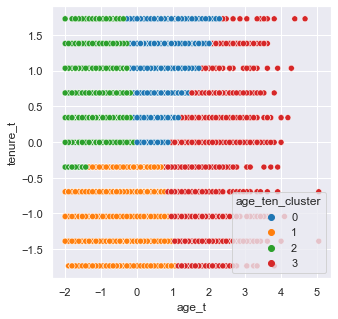

In [118]:
sns.scatterplot(data = df_cluster_t, x = 'age_t', y= 'tenure_t', hue = 'age_ten_cluster', palette = 'tab10')

In [119]:
pd.crosstab(df_cluster_t['age_ten_cluster'], df_cluster_t['exited'])

exited,0,1
age_ten_cluster,,
0,1659,666
1,3143,586
2,2501,251
3,660,534


Comment: 
1. old customer, churn rate is extremly high and is of big concern. 
2. middle age customer of high tenure, churn rate is high, which is also of concern. 
    

Acction Required:
1. Marketing team needs to indentify, why these group of cutomer, churn rate is high. 
2. marketing team needs to come up with the solution to decrease the churn rate. 

### age and estimated salary cluster analysis 

Text(0.5, 1.0, 'inertia by number of clusters for age and estimatedsalary')

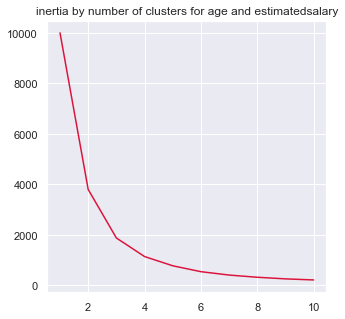

In [120]:
intertia_score2 = list()
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_cluster_t[['age_t', 'estimatedsalary_t']])
    intertia_score2.append(kmeans.inertia_)
#plotting inertia to check the optimum k
matplotlib.rcParams['figure.figsize'] = (5,5)
plt.plot(range(1,11), inertia_score, color = 'crimson')
plt.title("inertia by number of clusters for age and estimatedsalary")

We will take k = 4

#### Instantiation of clustering3

In [121]:
clustering3 = KMeans(n_clusters = 4)

#### model fitting 

In [122]:
clustering3.fit(df_cluster_t[['age_t', 'estimatedsalary_t']])
centroids3 = pd.DataFrame(clustering3.cluster_centers_)
centroids3.columns = ['x', 'y']
centroids3

,x,y
0,1.941938,-0.422351
1,-0.769173,0.821446
2,-0.329060,-0.908940
3,0.506797,0.853372


In [123]:
df_cluster_t['age_es_cluster'] = clustering3.labels_
df_cluster_t.head()

,creditscore_t,age_t,tenure_t,balance_t,estimatedsalary_t,gender,numofproducts,hascrcard,isactivemember,exited,region,creditscore,age,tenure,balance,estimatedsalary,age_cluster,age_ten_cluster,age_es_cluster
0,-0.326221,0.293517,-1.041760,-1.225848,0.021886,Female,1,1,1,1,east,619,42,2,0.00,101348.88,0,1,3
1,-0.440036,0.198164,-1.387538,0.117350,0.216534,Female,1,0,1,0,west,608,41,1,83807.86,112542.58,0,1,3
2,-1.536794,0.293517,1.032908,1.333053,0.240687,Female,3,1,0,1,east,502,42,8,159660.80,113931.57,0,0,3
3,0.501521,0.007457,-1.387538,-1.225848,-0.108918,Female,2,0,0,0,east,699,39,1,0.00,93826.63,0,1,2
4,2.063884,0.388871,-1.041760,0.785728,-0.365276,Female,1,1,1,0,west,850,43,2,125510.82,79084.10,1,1,2


<AxesSubplot:xlabel='age_t', ylabel='estimatedsalary_t'>

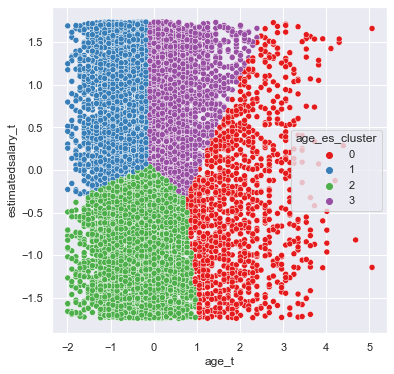

In [124]:
plt.figure(figsize = (6, 6))
sns.scatterplot(data = df_cluster_t, x = 'age_t', y= 'estimatedsalary_t', hue = 'age_es_cluster', palette = 'Set1')

In [125]:
pd.crosstab(df_cluster_t['age_es_cluster'], df_cluster_t['exited'])

exited,0,1
age_es_cluster,,
0,676,470
1,2427,240
2,3370,596
3,1490,731


Comment : it is obeserved that:
1. the age and estimatedsalary cluster, cluster 1, which are the customer of mid-age and high earning, they are churning and it is very bad for the company.
2. Cluster 2 which is old age people of all earning group, and their churning rate is also high, which is also of concern.
3. it is good sign that young people of high earning group, churn rate is low. 
4. in young people of low earning group, the churn rate is low. Not of a big concern. 



#### Action required
Marketing team needs to come up with some solution to decrease the churn rate of these group 

## age and balance cluster analysis 

Text(0.5, 1.0, 'inertia by number of clusters for age and balance')

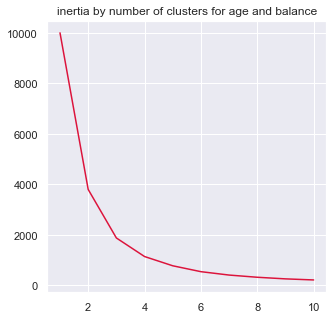

In [126]:
intertia_score3 = list()
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_cluster_t[['age_t', 'balance_t']])
    intertia_score2.append(kmeans.inertia_)
#plotting inertia to check the optimum k
matplotlib.rcParams['figure.figsize'] = (5,5)
plt.plot(range(1,11), inertia_score, color = 'crimson')
plt.title("inertia by number of clusters for age and balance")

#### instantiatiion of kmeans 

In [127]:
clustering4 = KMeans(n_clusters = 4)

#### Fiting model 

In [128]:
clustering4.fit(df_cluster_t[['age_t', 'balance_t']])

KMeans(n_clusters=4)

In [129]:
#### Adding Centroids

In [130]:
centroids4 = pd.DataFrame(clustering4.cluster_centers_)
centroids4.columns = ['x', 'y']
centroids4

,x,y
0,-0.678564,0.726328
1,-0.315367,-1.195198
2,2.184523,-0.260379
3,0.567012,0.744440


In [131]:
df_cluster_t['age_bal_cluster'] = clustering4.labels_
df_cluster_t.head()

,creditscore_t,age_t,tenure_t,balance_t,estimatedsalary_t,gender,numofproducts,hascrcard,isactivemember,exited,region,creditscore,age,tenure,balance,estimatedsalary,age_cluster,age_ten_cluster,age_es_cluster,age_bal_cluster
0,-0.326221,0.293517,-1.041760,-1.225848,0.021886,Female,1,1,1,1,east,619,42,2,0.00,101348.88,0,1,3,1
1,-0.440036,0.198164,-1.387538,0.117350,0.216534,Female,1,0,1,0,west,608,41,1,83807.86,112542.58,0,1,3,3
2,-1.536794,0.293517,1.032908,1.333053,0.240687,Female,3,1,0,1,east,502,42,8,159660.80,113931.57,0,0,3,3
3,0.501521,0.007457,-1.387538,-1.225848,-0.108918,Female,2,0,0,0,east,699,39,1,0.00,93826.63,0,1,2,1
4,2.063884,0.388871,-1.041760,0.785728,-0.365276,Female,1,1,1,0,west,850,43,2,125510.82,79084.10,1,1,2,3


<AxesSubplot:xlabel='age_t', ylabel='balance_t'>

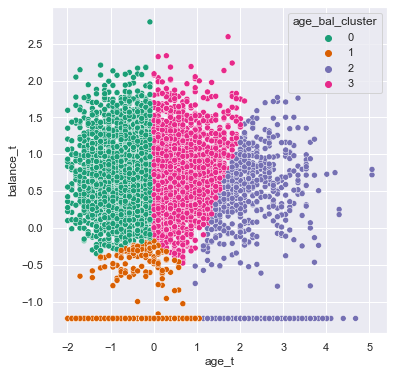

In [132]:
plt.figure(figsize = (6, 6))

sns.scatterplot(data = df_cluster_t, x = 'age_t', y= 'balance_t', hue = 'age_bal_cluster', palette = 'Dark2')

In [133]:
pd.crosstab(df_cluster_t['age_bal_cluster'], df_cluster_t['exited'])

exited,0,1
age_bal_cluster,,
0,2996,382
1,2948,385
2,569,347
3,1450,923


Comment:
1. Clearly big problem in cluster 2 and 3, and they are mid to old aged customers.

### age and creditscore cluster Analysis

#### Determining appropriate number of clusters

Text(0.5, 1.0, 'inertia by number of clusters for age and creditscore')

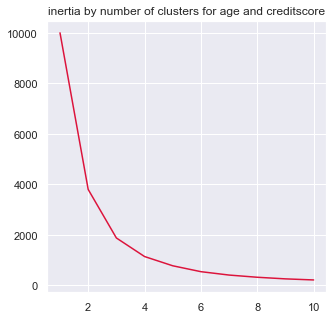

In [134]:
intertia_score4 = list()
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_cluster_t[['age_t', 'creditscore_t']])
    intertia_score2.append(kmeans.inertia_)
#plotting inertia to check the optimum k
matplotlib.rcParams['figure.figsize'] = (5,5)
plt.plot(range(1,11), inertia_score, color = 'crimson')
plt.title("inertia by number of clusters for age and creditscore")

We will take k = 4

#### Instantiation of KMeans

In [135]:
clustering5 = KMeans(n_clusters = 5)

#### model fitting

In [136]:
clustering5.fit(df_cluster_t[['age_t', 'creditscore_t']])
df_cluster_t['age_cs_cluster'] = clustering5.labels_
df_cluster_t.head()


,creditscore_t,age_t,tenure_t,balance_t,estimatedsalary_t,gender,numofproducts,hascrcard,isactivemember,exited,...,creditscore,age,tenure,balance,estimatedsalary,age_cluster,age_ten_cluster,age_es_cluster,age_bal_cluster,age_cs_cluster
0,-0.326221,0.293517,-1.041760,-1.225848,0.021886,Female,1,1,1,1,...,619,42,2,0.00,101348.88,0,1,3,1,4
1,-0.440036,0.198164,-1.387538,0.117350,0.216534,Female,1,0,1,0,...,608,41,1,83807.86,112542.58,0,1,3,3,4
2,-1.536794,0.293517,1.032908,1.333053,0.240687,Female,3,1,0,1,...,502,42,8,159660.80,113931.57,0,0,3,3,1
3,0.501521,0.007457,-1.387538,-1.225848,-0.108918,Female,2,0,0,0,...,699,39,1,0.00,93826.63,0,1,2,1,4
4,2.063884,0.388871,-1.041760,0.785728,-0.365276,Female,1,1,1,0,...,850,43,2,125510.82,79084.10,1,1,2,3,3


<AxesSubplot:xlabel='age_t', ylabel='creditscore_t'>

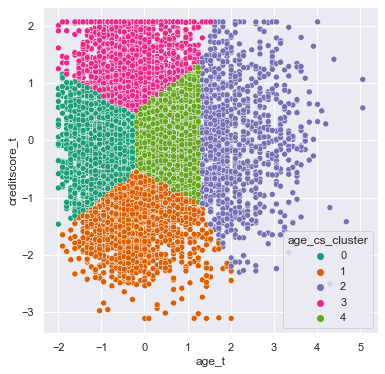

In [137]:
plt.figure(figsize = (6, 6))

sns.scatterplot(data = df_cluster_t, x = 'age_t', y= 'creditscore_t', hue = 'age_cs_cluster', palette = 'Dark2')

In [138]:
pd.crosstab(df_cluster_t['age_cs_cluster'], df_cluster_t['exited'])

exited,0,1
age_cs_cluster,,
0,2263,210
1,1625,412
2,588,396
3,1833,333
4,1654,686


Comment:
1. from age and credit score, it is understood that oldage customer of all level of credit score, churn rate is high.
2. churn is high in midaged with meduim credit score.
.
